## Q5: Planetary orbits

We want to consider planetary orbits.  To do this, we need to solve Newton's second law together with Newton's law of gravity.  If we restrict ourselves to the x-y plane, then there are 4 quantities we need to solve for: $x$, $y$, $v_x$, and $v_y$.  These evolve according to:

\begin{align*}
\frac{dx}{dt} &= v_x \\
\frac{dy}{dt} &= v_y \\
\frac{dv_x}{dt} &= a_x = -\frac{GM_\star x}{r^3} \\
\frac{dv_y}{dt} &= a_y = -\frac{GM_\star y}{r^3}
\end{align*}

To integrate these forward in time, we need an initial condition for each quantity.  We'll setup our system such that the Sun is at the origin (that will be one focus), and the planet begins at perihelion and orbits counterclockwise. 

The distance of perihelion from the focus is:

$$r_p = a (1 - e)$$

where $a$ is the semi-major axis and $e$ is the eccentricity.  The perihelion velocity is all in the $y$ direction and is:

$$v_y = v_p = \sqrt{\frac{GM_\star}{a} \frac{1+e}{1-e}}$$

We'll work in units of AU, years, and solar masses, in which case, $GM_\star = 4\pi^2$ (for the Sun).  

Your initial conditions should be:

  * $x(t=0) = r_p$
  * $y(t=0) = 0$
  * $v_x(t=0) = 0$
  * $v_y(t=0) = v_p$

Use the scipy ODE integration methods to integrate an orbit and plot it

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Visualizing Earth's Orbit

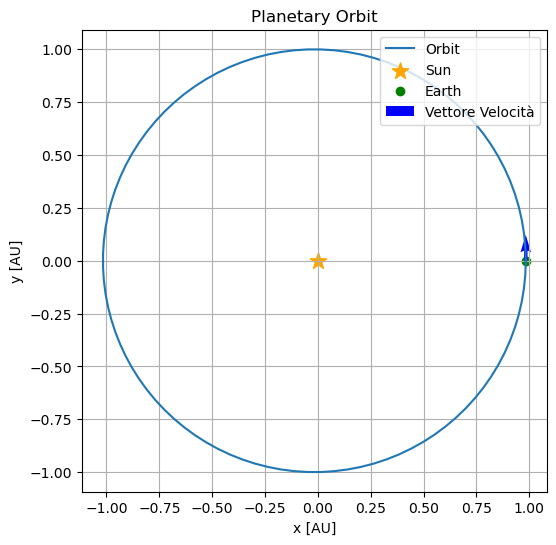

In [9]:
#parameters
a = 1 #AU
e = 0.0167
GM = 4 * np.pi**2
v_p = np.sqrt(GM * (1 + e) / (a * (1 - e)))
r_p = a * (1 - e)

#initial condition
x_0 = [r_p, 0, 0, v_p]
t = np.linspace(0, 1, 100) #time that I want observed

#system differential equation
def equations(x_0, t, GM):
    x, y, vx, vy = x_0
    r = np.sqrt(x**2 + y**2)  # distance from the Sun
    ax = -GM * x / r**3
    ay = -GM * y / r**3  
    return [vx, vy, ax, ay]

# Solve the system using odeint
solution = odeint(equations, x_0, t, args=(GM,))
x = solution[:, 0]
y = solution[:, 1]


# Plot the result
plt.figure(figsize=(6, 6))
plt.plot(x, y, label="Orbit")
plt.scatter([0], [0], s = 150, color="orange", marker="*", label="Sun")  # Sun at the origin
plt.scatter(x_0[0], x_0[1], color="green", label="Earth")  # Sun at the origin
plt.quiver(x_0[0], x_0[1], x_0[2], x_0[3], angles='xy', color="blue", label="Vettore Velocità")
plt.xlabel("x [AU]")
plt.ylabel("y [AU]")
plt.title("Planetary Orbit")
plt.legend(loc='upper right')
plt.axis("equal")
plt.grid(True)
plt.show()